In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('weather_data.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [4]:
data.shape

(5999, 12)

In [5]:
data.size

71988

In [6]:
list(data.columns)

['Formatted Date',
 'Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Daily Summary']

In [7]:
data.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,5999,5999,5999,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000,5999
unique,5999,14,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58
top,2006-12-26 06:00:00.000 +0100,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,1,1791,4762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600
mean,NaN,NaN,NaN,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,0.0,997.359828,NaN
std,NaN,NaN,NaN,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,0.0,145.173638,NaN
min,NaN,NaN,NaN,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,0.0,1012.060000,NaN
50%,NaN,NaN,NaN,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,0.0,1016.840000,NaN
75%,NaN,NaN,NaN,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,0.0,1022.490000,NaN


## DATA CLEANING

In [8]:
# information of data before cleaning.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [9]:
cols = ['Summary','Precip Type','Daily Summary','Wind Bearing (degrees)','Visibility (km)','Loud Cover']
data = data.drop(cols,axis=1)

In [10]:
# Converting Formatted Date from Object to DateTimeObject.
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Temperature (C)           5999 non-null   float64
 2   Apparent Temperature (C)  5999 non-null   float64
 3   Humidity                  5999 non-null   float64
 4   Wind Speed (km/h)         5999 non-null   float64
 5   Pressure (millibars)      5999 non-null   float64
dtypes: float64(5), object(1)
memory usage: 281.3+ KB


In [11]:
# Indexing according to date and time.
idata = data.sort_values(by=['Formatted Date'])

In [12]:
# Setting Index
idata = idata.set_index('Formatted Date')
idata.index

Index([2006-01-01 00:00:00+01:00, 2006-01-01 01:00:00+01:00,
       2006-01-01 02:00:00+01:00, 2006-01-01 03:00:00+01:00,
       2006-01-01 04:00:00+01:00, 2006-01-01 05:00:00+01:00,
       2006-01-01 06:00:00+01:00, 2006-01-01 07:00:00+01:00,
       2006-01-01 08:00:00+01:00, 2006-01-01 09:00:00+01:00,
       ...
       2006-12-31 14:00:00+01:00, 2006-12-31 15:00:00+01:00,
       2006-12-31 16:00:00+01:00, 2006-12-31 17:00:00+01:00,
       2006-12-31 18:00:00+01:00, 2006-12-31 19:00:00+01:00,
       2006-12-31 20:00:00+01:00, 2006-12-31 21:00:00+01:00,
       2006-12-31 22:00:00+01:00, 2006-12-31 23:00:00+01:00],
      dtype='object', name='Formatted Date', length=5999)

In [13]:
#removing duplicate values in the index
idata.index.drop_duplicates(keep='first')

Index([2006-01-01 00:00:00+01:00, 2006-01-01 01:00:00+01:00,
       2006-01-01 02:00:00+01:00, 2006-01-01 03:00:00+01:00,
       2006-01-01 04:00:00+01:00, 2006-01-01 05:00:00+01:00,
       2006-01-01 06:00:00+01:00, 2006-01-01 07:00:00+01:00,
       2006-01-01 08:00:00+01:00, 2006-01-01 09:00:00+01:00,
       ...
       2006-12-31 14:00:00+01:00, 2006-12-31 15:00:00+01:00,
       2006-12-31 16:00:00+01:00, 2006-12-31 17:00:00+01:00,
       2006-12-31 18:00:00+01:00, 2006-12-31 19:00:00+01:00,
       2006-12-31 20:00:00+01:00, 2006-12-31 21:00:00+01:00,
       2006-12-31 22:00:00+01:00, 2006-12-31 23:00:00+01:00],
      dtype='object', name='Formatted Date', length=5999)

In [14]:
# data after cleaning
idata.dropna()
idata.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+01:00,0.577778,-4.050000,0.89,17.1143,1016.66
2006-01-01 01:00:00+01:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 02:00:00+01:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 03:00:00+01:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 04:00:00+01:00,1.183333,-2.744444,0.86,13.9426,1014.98


In [15]:
# information of data after after cleaning.
idata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5999 entries, 2006-01-01 00:00:00+01:00 to 2006-12-31 23:00:00+01:00
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           5999 non-null   float64
 1   Apparent Temperature (C)  5999 non-null   float64
 2   Humidity                  5999 non-null   float64
 3   Wind Speed (km/h)         5999 non-null   float64
 4   Pressure (millibars)      5999 non-null   float64
dtypes: float64(5)
memory usage: 441.2+ KB


## EXPLORATORY DATA ANALYSIS

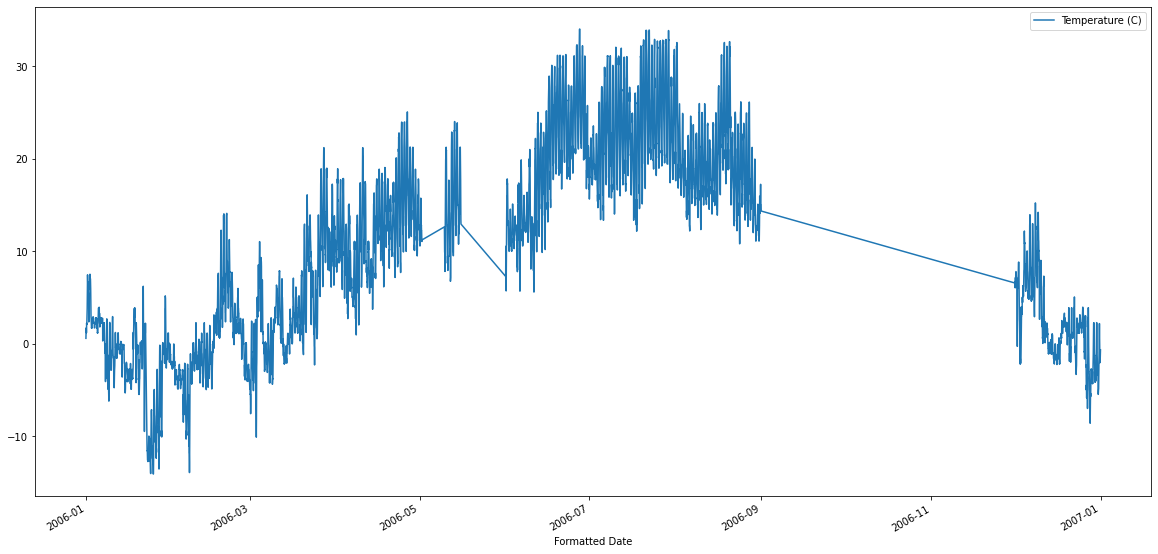

In [16]:
#plotting the data
idata.plot(y="Temperature (C)",figsize=(20,10))

In [17]:
#resampling the data into day format
idata.index = pd.to_datetime(idata.index,utc=True)
idata2 = idata.resample(rule='D').mean()
idata2.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,1016.660000
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,1011.985000
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,1010.384167
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,1021.170833
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,981.770833


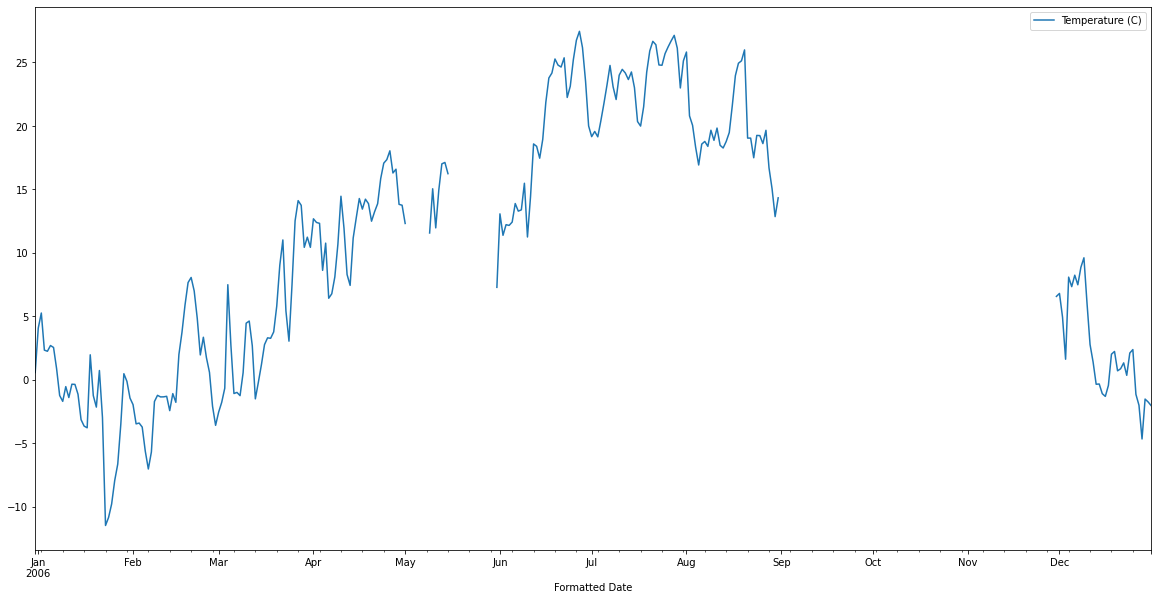

In [18]:
idata2.plot(y="Temperature (C)",figsize=(20,10))

In [19]:
#extracting data from the month of January
jan2006 = idata['2006-01-01':'2006-01-31']
jan2006

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98
2006-01-01 04:00:00+00:00,1.205556,-3.072222,0.85,15.9068,1014.08
...,...,...,...,...,...
2006-01-31 19:00:00+00:00,-2.400000,-2.400000,0.88,4.6046,1024.54
2006-01-31 20:00:00+00:00,-1.933333,-1.933333,0.85,3.2200,1024.29
2006-01-31 21:00:00+00:00,-1.922222,-3.988889,0.86,5.4901,1024.66


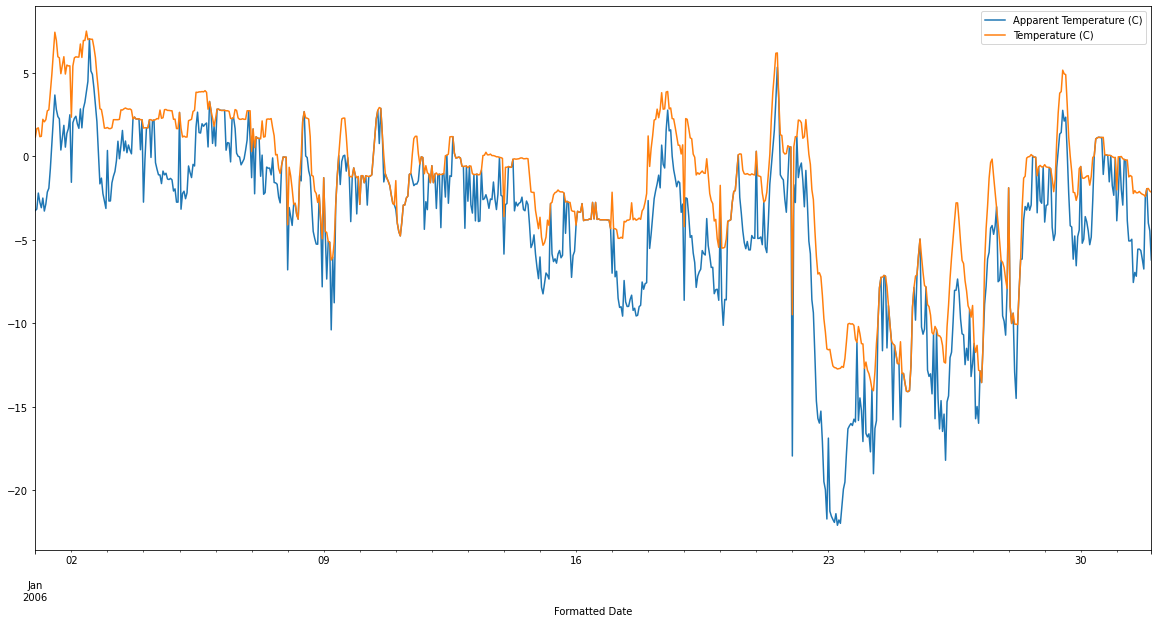

In [20]:
jan2006.plot(y=['Apparent Temperature (C)','Temperature (C)'],kind='line',figsize=(20,10))

In [21]:
#resampling
JAN = jan2006.resample(rule='D').mean()
JAN.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,1011.985000
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,1010.384167
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,1021.170833
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,981.770833
2006-01-05 00:00:00+00:00,2.703935,0.445833,0.951250,8.991179,935.873750


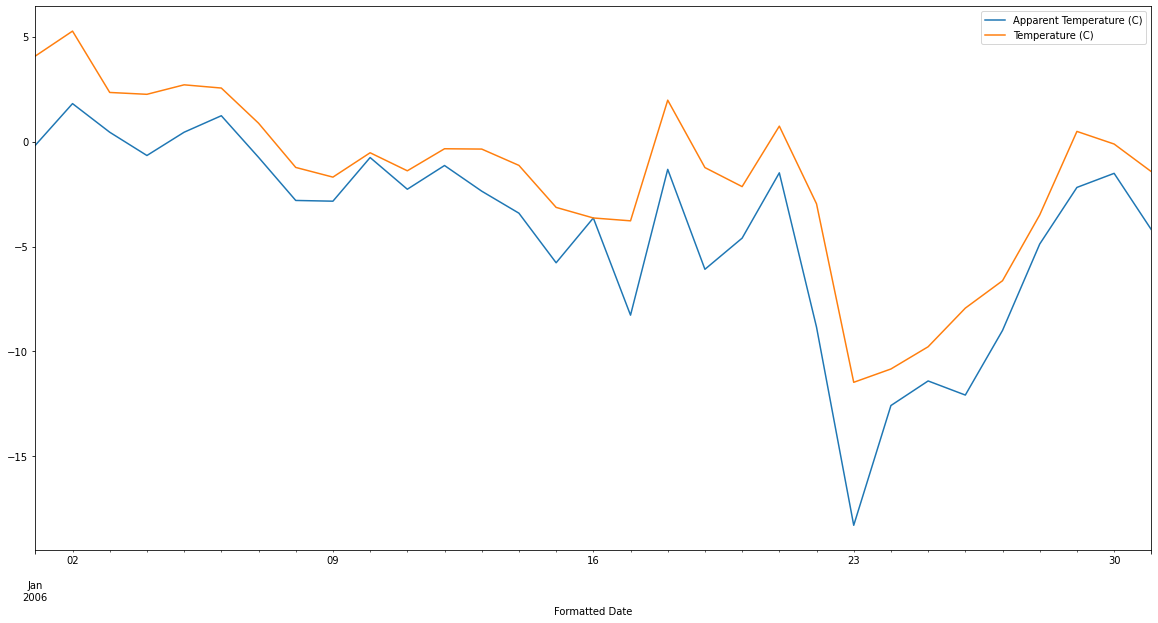

In [22]:
JAN.plot(y=['Apparent Temperature (C)','Temperature (C)'],kind='line',figsize=(20,10))

In [23]:
winter = idata2['2006-01-01':'2006-02-28']
winter2 = idata2['2006-12-01':'2006-12-31']
spring = idata2['2006-03-01':'2006-05-31']
summer = idata2['2006-06-01':'2006-08-31']

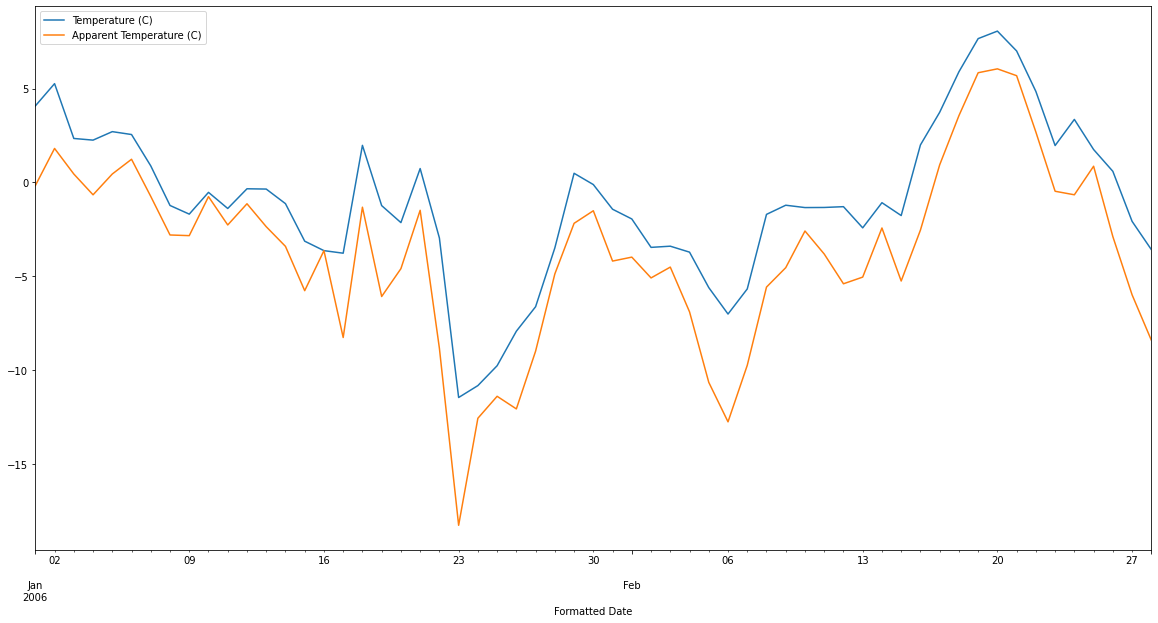

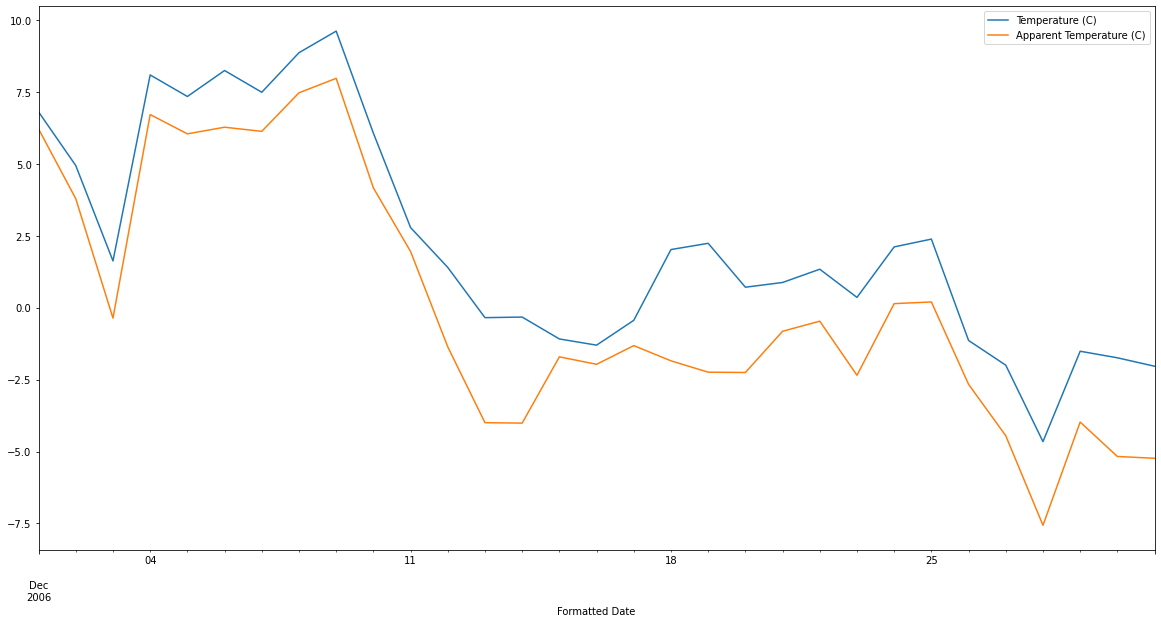

In [24]:
winter.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))
winter2.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

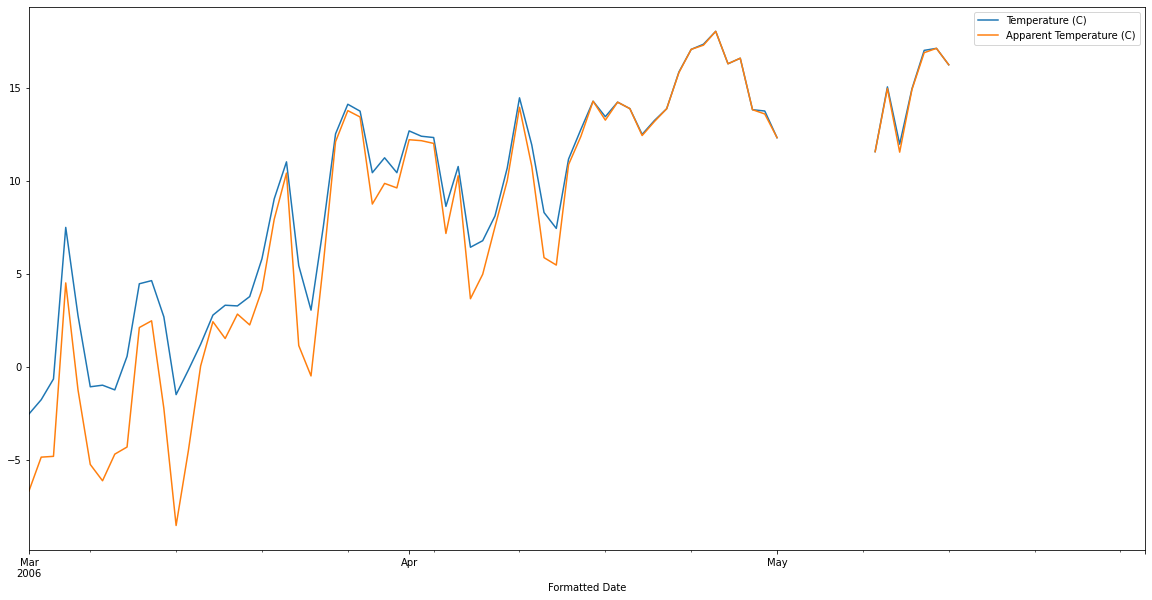

In [25]:
spring.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

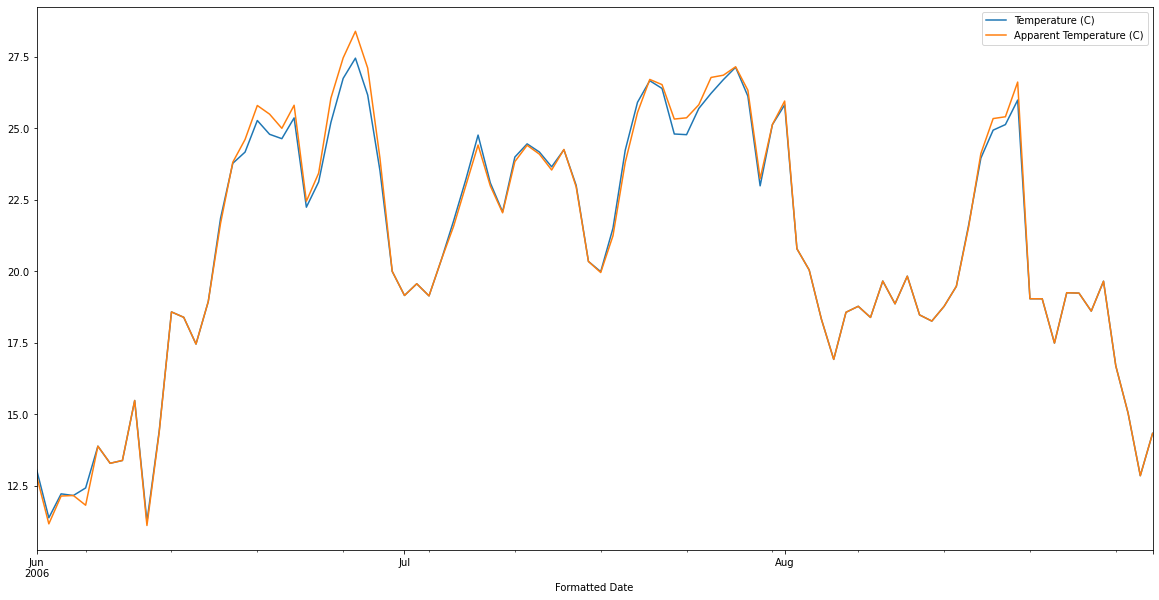

In [26]:
summer.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

## Correlation in data

In [27]:
#checking correlation between the cols
data.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Temperature (C),1.000000,0.992881,-0.564260,-0.053935,-0.080315
Apparent Temperature (C),0.992881,1.000000,-0.535399,-0.126701,-0.077491
Humidity,-0.564260,-0.535399,1.000000,-0.209529,0.061836
Wind Speed (km/h),-0.053935,-0.126701,-0.209529,1.000000,-0.043172
Pressure (millibars),-0.080315,-0.077491,0.061836,-0.043172,1.000000


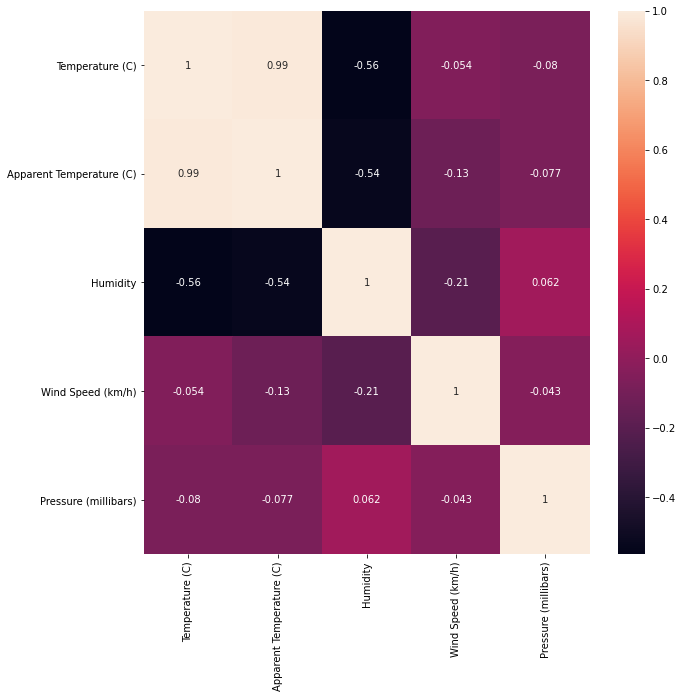

In [28]:
#plotting the correlation
plt.figure(figsize  =(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

## Data Visualization

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


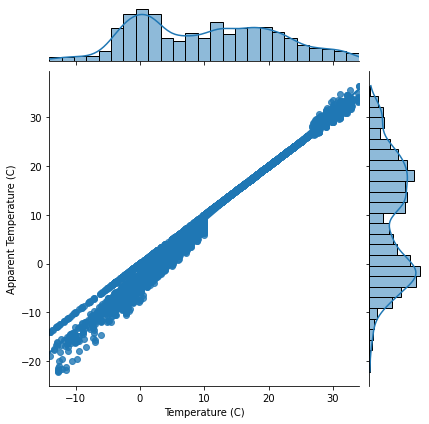

In [29]:
sns.jointplot('Temperature (C)', 'Apparent Temperature (C)',kind="reg", data=data)

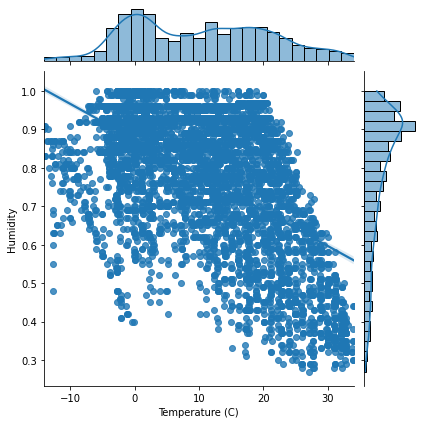

In [30]:
sns.jointplot(kind='reg',y=data['Humidity'],x=data['Temperature (C)'])

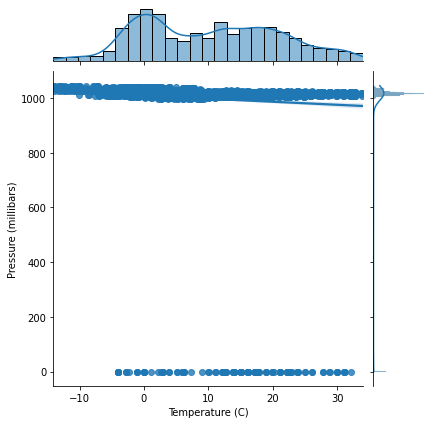

In [31]:
sns.jointplot(kind='reg',y=data['Pressure (millibars)'],x=data['Temperature (C)'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


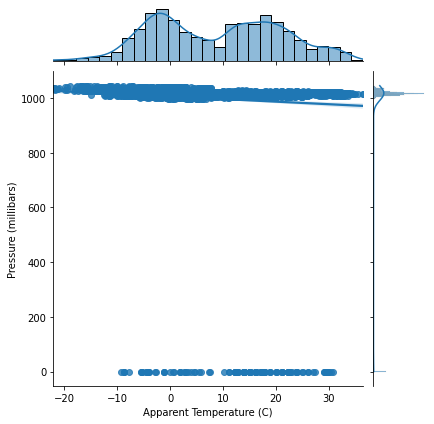

In [32]:
sns.jointplot('Apparent Temperature (C)','Pressure (millibars)',kind="reg", data=data)

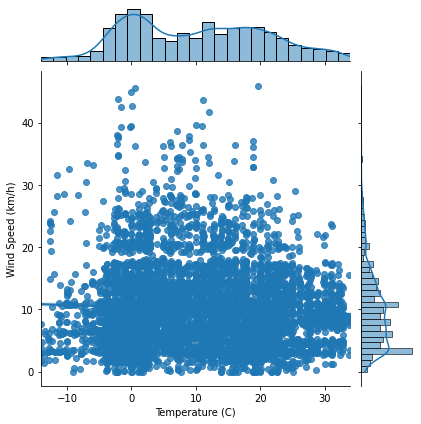

In [33]:
sns.jointplot(kind='reg',y=data['Wind Speed (km/h)'],x=data['Temperature (C)'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


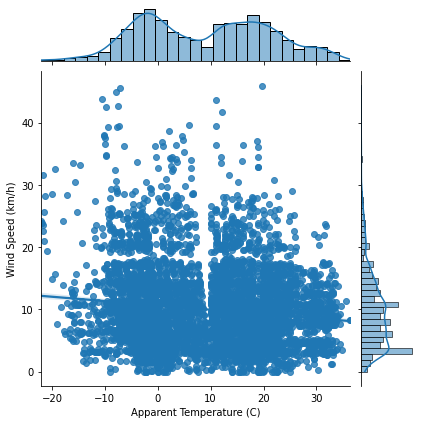

In [34]:
sns.jointplot('Apparent Temperature (C)','Wind Speed (km/h)',kind="reg", data=data)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


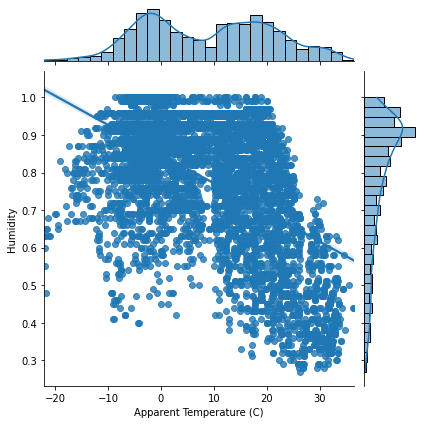

In [35]:
sns.jointplot('Apparent Temperature (C)','Humidity',kind="reg", data=data)

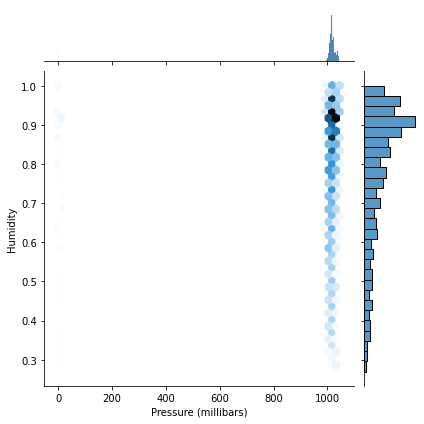

In [36]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Pressure (millibars)'])

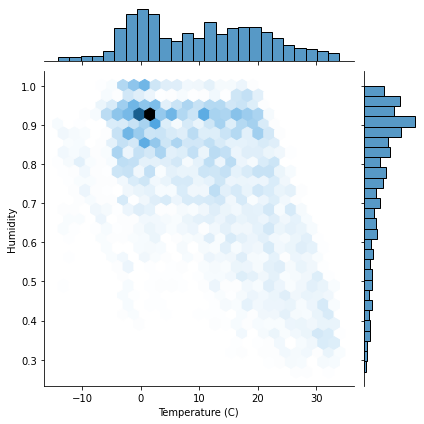

In [37]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Temperature (C)'])

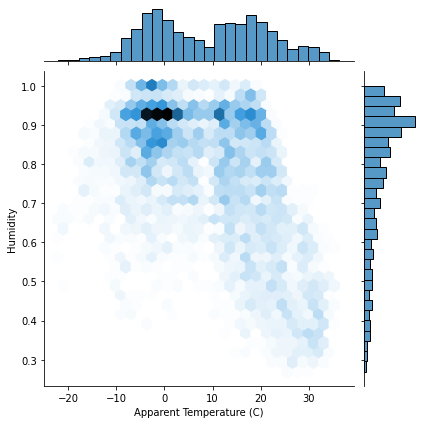

In [38]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Apparent Temperature (C)'])

<Figure size 1440x1440 with 0 Axes>

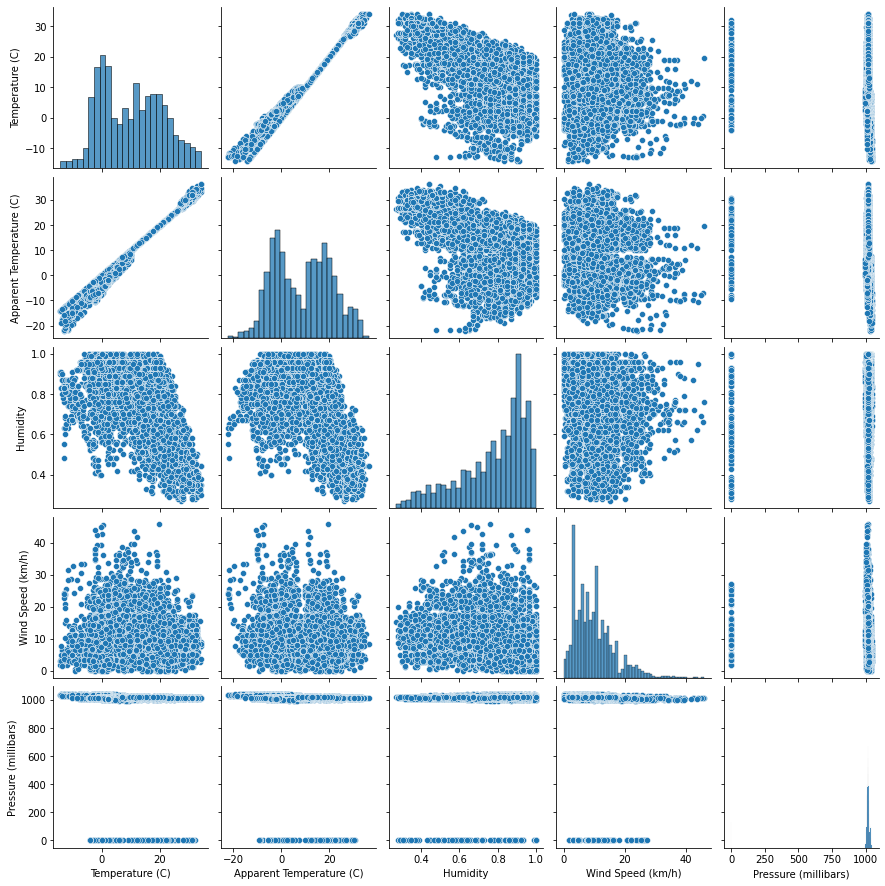

In [39]:
plt.figure(figsize =(20,20))
sns.pairplot(data)
plt.show()

In [40]:
#taking 70% of the data for training
X = idata['2006-01-01':'2006-07-20']
X

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98
2006-01-01 04:00:00+00:00,1.205556,-3.072222,0.85,15.9068,1014.08
...,...,...,...,...,...
2006-07-20 19:00:00+00:00,25.027778,25.027778,0.62,0.0000,1020.38
2006-07-20 20:00:00+00:00,23.244444,23.244444,0.70,1.1109,1020.61
2006-07-20 21:00:00+00:00,22.255556,22.255556,0.79,2.7370,1020.75


In [41]:
#30% of data for testing
X1 = idata['2006-07-21':'2006-12-31']
X1

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-07-21 00:00:00+00:00,21.277778,21.277778,0.85,2.7370,1018.96
2006-07-21 01:00:00+00:00,17.733333,17.733333,0.90,2.9946,1020.64
2006-07-21 02:00:00+00:00,17.711111,17.711111,0.90,6.1502,1020.62
2006-07-21 03:00:00+00:00,17.472222,17.472222,0.89,1.9159,1020.76
2006-07-21 04:00:00+00:00,16.766667,16.766667,0.93,3.2200,1020.82
...,...,...,...,...,...
2006-12-31 18:00:00+00:00,-0.827778,-4.211111,0.92,9.7405,1035.95
2006-12-31 19:00:00+00:00,-2.011111,-5.888889,0.99,10.6904,1035.78
2006-12-31 20:00:00+00:00,-1.500000,-5.327778,0.96,10.8997,1034.92


In [42]:
#taking cols for training the model
X_train = X[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4248 entries, 2006-01-01 00:00:00+00:00 to 2006-07-20 23:00:00+00:00
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature (C)       4248 non-null   float64
 1   Humidity              4248 non-null   float64
 2   Wind Speed (km/h)     4248 non-null   float64
 3   Pressure (millibars)  4248 non-null   float64
dtypes: float64(4)
memory usage: 165.9 KB


In [43]:
Y_train = X['Apparent Temperature (C)']
Y_train

Formatted Date
2006-01-01 00:00:00+00:00    -3.238889
2006-01-01 01:00:00+00:00    -3.155556
2006-01-01 02:00:00+00:00    -2.194444
2006-01-01 03:00:00+00:00    -2.744444
2006-01-01 04:00:00+00:00    -3.072222
                               ...    
2006-07-20 19:00:00+00:00    25.027778
2006-07-20 20:00:00+00:00    23.244444
2006-07-20 21:00:00+00:00    22.255556
2006-07-20 22:00:00+00:00    19.494444
2006-07-20 23:00:00+00:00    19.422222
Name: Apparent Temperature (C), Length: 4248, dtype: float64

In [44]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
#taking cols for testing
X_test = X1[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
X_test

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,
2006-07-21 00:00:00+00:00,21.277778,0.85,2.7370,1018.96
2006-07-21 01:00:00+00:00,17.733333,0.90,2.9946,1020.64
2006-07-21 02:00:00+00:00,17.711111,0.90,6.1502,1020.62
2006-07-21 03:00:00+00:00,17.472222,0.89,1.9159,1020.76
2006-07-21 04:00:00+00:00,16.766667,0.93,3.2200,1020.82
...,...,...,...,...
2006-12-31 18:00:00+00:00,-0.827778,0.92,9.7405,1035.95
2006-12-31 19:00:00+00:00,-2.011111,0.99,10.6904,1035.78
2006-12-31 20:00:00+00:00,-1.500000,0.96,10.8997,1034.92


In [46]:
Y_test = X1['Apparent Temperature (C)']
Y_test

Formatted Date
2006-07-21 00:00:00+00:00    21.277778
2006-07-21 01:00:00+00:00    17.733333
2006-07-21 02:00:00+00:00    17.711111
2006-07-21 03:00:00+00:00    17.472222
2006-07-21 04:00:00+00:00    16.766667
                               ...    
2006-12-31 18:00:00+00:00    -4.211111
2006-12-31 19:00:00+00:00    -5.888889
2006-12-31 20:00:00+00:00    -5.327778
2006-12-31 21:00:00+00:00    -4.961111
2006-12-31 22:00:00+00:00    -4.138889
Name: Apparent Temperature (C), Length: 1750, dtype: float64

In [47]:
#predicting the Apparent Temperature
y_pred = regr.predict(X_test)

In [48]:
regr.score(X_test,Y_test)

0.992393474491749

### Showing the Actual Apparent Temperature and the predicted Apparent Temperature 

In [49]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
Formatted Date,,
2006-07-21 00:00:00+00:00,21.277778,22.563679
2006-07-21 01:00:00+00:00,17.733333,18.561591
2006-07-21 02:00:00+00:00,17.711111,18.096287
2006-07-21 03:00:00+00:00,17.472222,18.410439
2006-07-21 04:00:00+00:00,16.766667,17.459674
...,...,...
2006-12-31 18:00:00+00:00,-4.211111,-3.313653
2006-12-31 19:00:00+00:00,-5.888889,-4.733725
2006-12-31 20:00:00+00:00,-5.327778,-4.206968


### Calculating the error in prediction 

In [50]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.8110788905226733
Mean Squared Error:  1.0493637098684712
Root Mean Squared Error:  1.0243845517521588


In [51]:
from xgboost import XGBRegressor

In [79]:
xgb=XGBRegressor(gamma=0.0453032172664104,
 learning_rate= 0.2155158027999262,
 max_depth= 5,
 n_estimators= 102,
 subsample= 0.9439761626945282)

In [80]:
xgb.fit(X_train,Y_train)

[21:30:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.0453032172664104,
             importance_type='gain', learning_rate=0.2155158027999262,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
             n_estimators=102, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.9439761626945282, verbosity=1)

In [81]:
y_pred = xgb.predict(X_test)

In [82]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.11692810092049431
Mean Squared Error:  0.03126667807652245
Root Mean Squared Error:  0.17682386172833814


In [56]:
from lightgbm import LGBMRegressor

In [57]:
lgb=LGBMRegressor()

In [58]:
lgb.fit(X_train,Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [59]:
y_pred = lgb.predict(X_test)

In [60]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.12603677540477076
Mean Squared Error:  0.052548938947025836
Root Mean Squared Error:  0.2292355534096442


In [61]:
!pip install catboost

In [62]:
from catboost import CatBoostRegressor

In [63]:
cb=CatBoostRegressor()

In [64]:
cb.fit(X_train,Y_train)

Learning rate set to 0.050491
0:	learn: 11.1854980	total: 48.9ms	remaining: 48.8s
1:	learn: 10.6729251	total: 50.7ms	remaining: 25.3s
2:	learn: 10.1893383	total: 52.6ms	remaining: 17.5s
3:	learn: 9.7350345	total: 54.5ms	remaining: 13.6s
4:	learn: 9.2819337	total: 56.4ms	remaining: 11.2s
5:	learn: 8.8621812	total: 58.3ms	remaining: 9.65s
6:	learn: 8.4572324	total: 60.1ms	remaining: 8.52s
7:	learn: 8.0824831	total: 61.8ms	remaining: 7.67s
8:	learn: 7.7262716	total: 63.6ms	remaining: 7s
9:	learn: 7.3730265	total: 65.4ms	remaining: 6.47s
10:	learn: 7.0356629	total: 67.1ms	remaining: 6.03s
11:	learn: 6.7256345	total: 68.9ms	remaining: 5.67s
12:	learn: 6.4213348	total: 70.6ms	remaining: 5.36s
13:	learn: 6.1371910	total: 72.4ms	remaining: 5.1s
14:	learn: 5.8575209	total: 74.2ms	remaining: 4.87s
15:	learn: 5.6003189	total: 75.9ms	remaining: 4.67s
16:	learn: 5.3690677	total: 77.8ms	remaining: 4.5s
17:	learn: 5.1334395	total: 79.5ms	remaining: 4.34s
18:	learn: 4.9130155	total: 81.3ms	remaining: 

In [65]:
y_pred = cb.predict(X_test)

In [66]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.14285031183325966
Mean Squared Error:  0.05510971079878742
Root Mean Squared Error:  0.23475457567167338


In [68]:
from sklearn.ensemble import StackingRegressor

In [89]:
estimators = [('regr', regr), ('xgb', XGBRegressor(gamma=0.0453032172664104,
 learning_rate= 0.2155158027999262,
 max_depth= 5,
 n_estimators= 102,
 subsample= 0.9439761626945282)), ('lgb', LGBMRegressor(gamma=0.18727005942368125,
 learning_rate=0.3152142919229748,
 max_depth= 4,
 n_estimators= 107,
 subsample= 0.8394633936788146)),('cb', cb)]

clf = StackingRegressor(estimators=estimators)

In [90]:
clf.fit(X_train,Y_train)

Streaming output truncated to the last 5000 lines.
4:	learn: 8.7886764	total: 9.49ms	remaining: 1.89s
5:	learn: 8.3981492	total: 11.2ms	remaining: 1.85s
6:	learn: 8.0253279	total: 12.9ms	remaining: 1.83s
7:	learn: 7.6685387	total: 14.7ms	remaining: 1.82s
8:	learn: 7.3461287	total: 16.6ms	remaining: 1.82s
9:	learn: 7.0399925	total: 18.4ms	remaining: 1.82s
10:	learn: 6.7279614	total: 20.2ms	remaining: 1.81s
11:	learn: 6.4382673	total: 21.8ms	remaining: 1.8s
12:	learn: 6.1536721	total: 23.5ms	remaining: 1.78s
13:	learn: 5.8915681	total: 25.3ms	remaining: 1.78s
14:	learn: 5.6344750	total: 27.1ms	remaining: 1.78s
15:	learn: 5.3910844	total: 28.9ms	remaining: 1.78s
16:	learn: 5.1693274	total: 33ms	remaining: 1.91s
17:	learn: 4.9495305	total: 36.2ms	remaining: 1.97s
18:	learn: 4.7460374	total: 40.2ms	remaining: 2.07s
19:	learn: 4.5468064	total: 42.8ms	remaining: 2.1s
20:	learn: 4.3602405	total: 44.7ms	remaining: 2.08s
21:	learn: 4.1786171	total: 46.7ms	remaining: 2.08s
22:	learn: 4.0010116	to

StackingRegressor(cv=None,
                  estimators=[('regr',
                               LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False)),
                              ('xgb',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            gamma=0.0453032172664104,
                                            importance_type='gain',
                                            learning_rate=0.2155158027999262,
                                            max_delta_step=0, max_depth=5,
                                            min_ch...
                                             min_child_weight=0.001,
                                             min_s

In [91]:
y_pred = clf.predict(X_test)

In [72]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.meapn_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.561586893777428
Mean Squared Error:  0.4680959629102381
Root Mean Squared Error:  0.6841753889977613


In [93]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.5221416911743425
Mean Squared Error:  0.3989726907156547
Root Mean Squared Error:  0.6316428506012355


In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
from scipy.stats import uniform, randint
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [74]:
xgb=XGBRegressor()

In [77]:
xgb = RandomizedSearchCV(estimator = xgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb.fit(idata[:][['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']],idata[:]['Apparent Temperature (C)'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[21:28:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.3s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[21:28:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.3s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[21:28:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.3s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[21:28:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.3s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   14.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9ecc56ca90>,
                                        'n_estimators': <scipy.

In [78]:
xgb.best_params_

{'gamma': 0.0453032172664104,
 'learning_rate': 0.2155158027999262,
 'max_depth': 5,
 'n_estimators': 102,
 'subsample': 0.9439761626945282}

In [83]:
from scipy.stats import uniform, randint
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [84]:
lgb=LGBMRegressor()

In [85]:
lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
lgb.fit(idata[:][['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']],idata[:]['Apparent Temperature (C)'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146 
[CV]  gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146, total=   0.1s
[CV] gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741 
[CV]  gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741, total=   0.1s
[CV] gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741 
[CV]  gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741, total=   0.1s
[CV] gamma=0.07800932022121826, learning_rate=0

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silen...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9ecc09d278>,
           

In [86]:
lgb.best_params_

{'gamma': 0.18727005942368125,
 'learning_rate': 0.3152142919229748,
 'max_depth': 4,
 'n_estimators': 107,
 'subsample': 0.8394633936788146}